In [1]:
import sys
import os
from IPython.core.display import display, HTML

"""
On Windows, sometimes, some cuda libraries does not work very well. One needs to add the cuda path mannually.
The following line is an example.
"""
os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli\Anaconda3\envs\python36\Library\bin"

"""
Because I have not realised this package. To use this package, one can not simply install with pip.
Instead, one needs to clone from the repo and append the path to this repo to the system path variable.
"""
sys.path.append('C:/Users/hyli/Documents/GitHub/Phasing/')

"""
This line is totally optional. It only changes the cell width.
"""
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import some other necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import PhaseTool   # This is the name of this package
import copy
from scipy import ndimage

# Create a smooth object

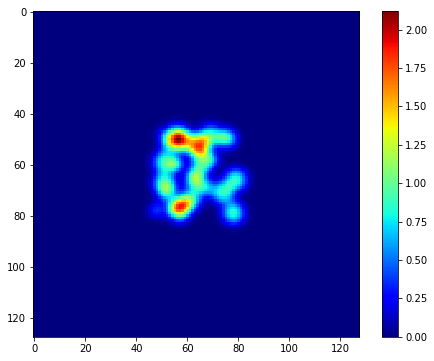

In [2]:
sample = PhaseTool.util.get_smooth_sample(support_length=32, space_length=128, obj_num=34)

fig = plt.figure(figsize=(8,6))
plt.imshow(sample, cmap='jet')
plt.colorbar()
plt.show()

# Get the diffraction info

In [3]:
diffraction = np.fft.ifftshift(np.fft.fftn(sample))
magnitude = np.abs(diffraction)

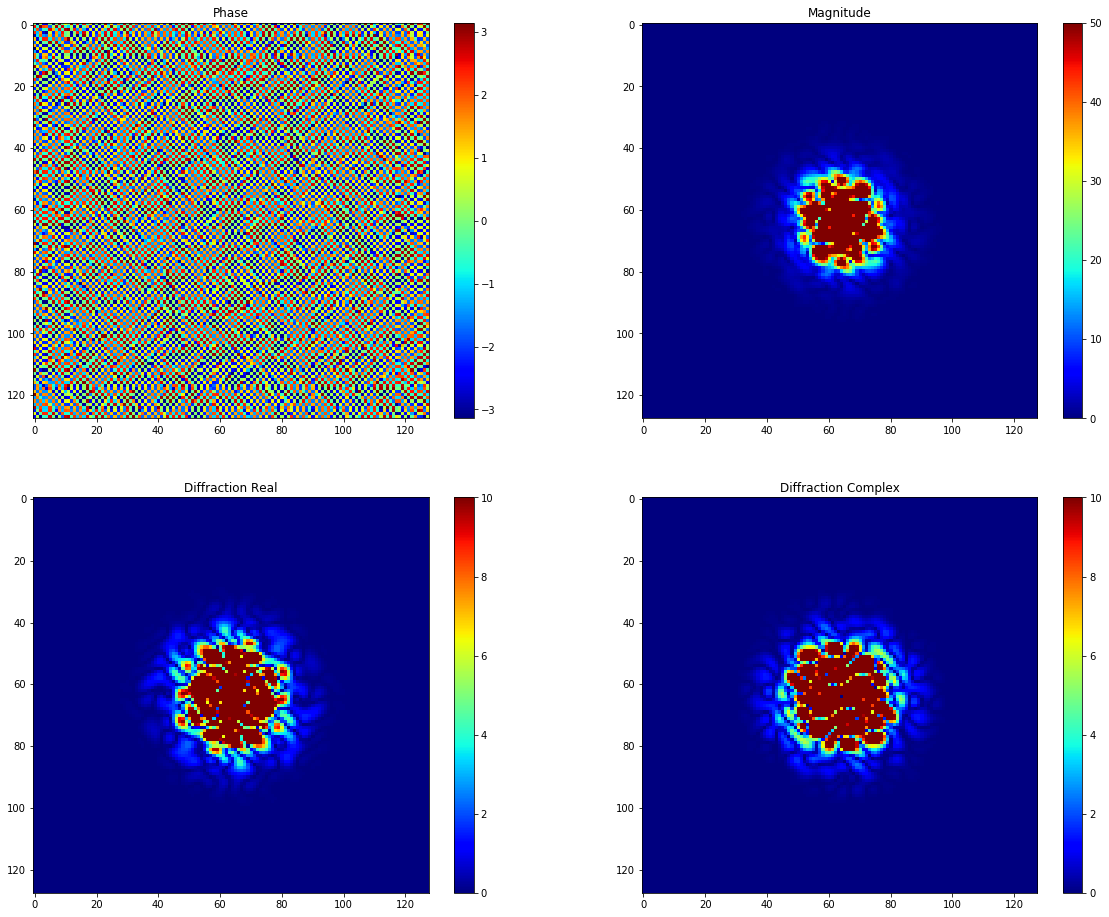

In [4]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(np.angle(diffraction), cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Phase")

im = axes[0,1].imshow(magnitude, vmax=50, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Magnitude")

im = axes[1,0].imshow(np.abs(diffraction.real), vmax=10,cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Diffraction Real")

im = axes[1,1].imshow(np.abs(diffraction.imag), vmax=10,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Diffraction Complex")

# Show the canvas
plt.show()  

# Begin Test

In [17]:
# Step 1: Create a object
alter_proj = PhaseTool.AlterProj.BaseAlterProj()

# Step 2: Initialize the object with the data
alter_proj.initialize_easy(magnitude=np.fft.ifftshift(magnitude),
                           magnitude_mask=np.ones_like(magnitude,dtype=np.bool),
                           full_initialization=False)
# Step 3: Set initial guess
alter_proj.set_support(support=alter_proj.derive_support_from_autocorrelation(threshold=0.04,
                                                                   gaussian_filter=True,
                                                                   sigma=1.0,
                                                                   fill_detector_gap=False,
                                                                   bin_num=300))

alter_proj.set_zeroth_iteration_value(fill_detector_gap=False, phase="Random")

alter_proj.update_input_dict()

alter_proj.shrink_warp_properties(on=False,
                                  threshold_ratio=0.04,
                                  sigma=10.,
                                  decay_rate=50,
                                  threshold_ratio_decay_ratio=1.0,
                                  sigma_decay_ratio=0.99,
                                  filling_holes=False,
                                  convex_hull=False)
    
alter_proj.set_beta_and_iter_num(beta=0.75,
                                 iter_num=1200,
                                 decay=True, 
                                 decay_rate=20)

alter_proj.set_algorithm(alg_name="RAAR")

The center of the diffraction is :
[ 64.  64.]
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 10.0
The decay_rate argument is set to be 50
Therefore, the shrink wrap algorithm will be applied every 50iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The user uses 

In [18]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj.execute_algorithm()

The self.iter_counter is set to 0.
Using algorithm RAAR
Finishes self-consistency check.
iteration number: 0
iteration number: 100
iteration number: 200
iteration number: 300
iteration number: 400
iteration number: 500
iteration number: 600
iteration number: 700
iteration number: 800
iteration number: 900
iteration number: 1000
iteration number: 1100


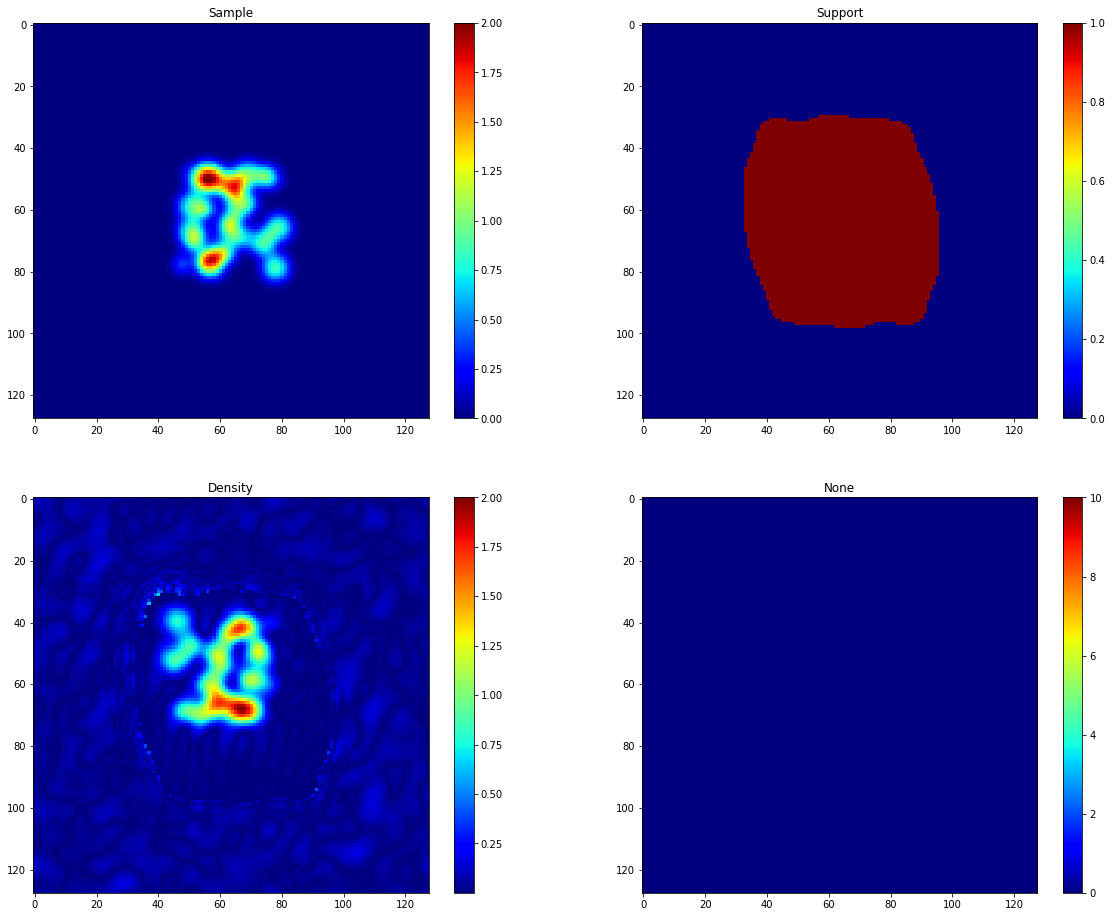

In [19]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.abs(np.fft.ifftshift(alter_proj.data_dict['support'])), cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.abs(np.fft.ifftshift(alter_proj.data_dict['density'])), vmax=2,cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.zeros_like(sample), vmax=10,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [20]:
# Step 2: Initialize the object with the data
alter_proj_2 = copy.deepcopy(alter_proj)

alter_proj_2.shrink_warp_properties(on=True,
                                    threshold_ratio=0.04,
                                    sigma=5.,
                                    decay_rate=30,
                                    threshold_ratio_decay_ratio=1.0,
                                    sigma_decay_ratio=0.95,
                                    filling_holes=True,
                                    convex_hull=False)

Enable shrink wrap functions.
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 5.0
The decay_rate argument is set to be 30
Therefore, the shrink wrap algorithm will be applied every 30iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay to 0.95 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
Filling holes in the support de

In [21]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj_2.execute_algorithm()

The self.iter_counter is set to 0.
Using algorithm RAAR
Finishes self-consistency check.
iteration number: 0
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
iteration number: 100
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
iteration number: 200
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
As per request, fill holes in the support. The convex_hull argument is ignored.
iteration number: 300
As per request, fill hole

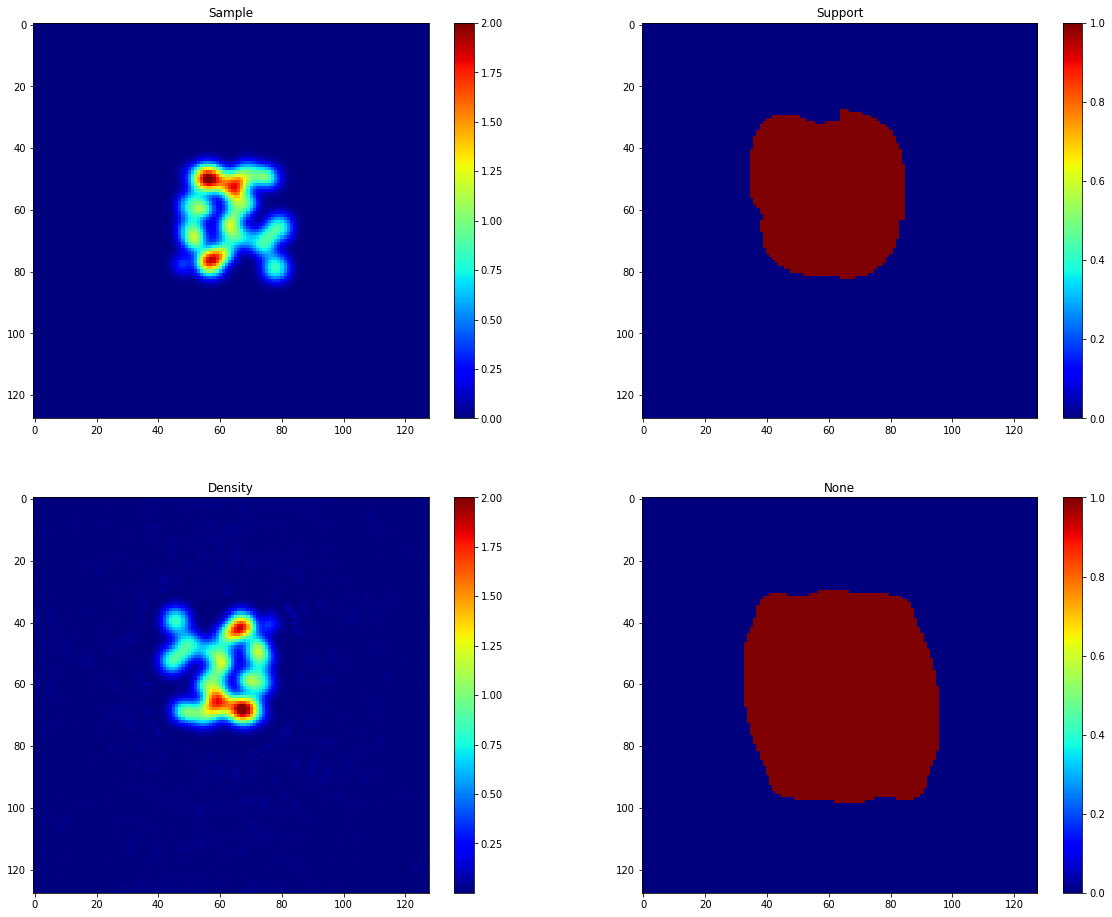

In [22]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.fft.ifftshift(alter_proj_2.data_dict['support']), cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.abs(np.fft.ifftshift(alter_proj_2.data_dict['density'])), vmax=2,cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.fft.ifftshift(alter_proj.data_dict['support']),cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [23]:
# Step 2: Initialize the object with the data
alter_proj_3 = copy.deepcopy(alter_proj_2)

alter_proj_3.set_algorithm(alg_name="ER")
alter_proj_3.set_beta_and_iter_num(iter_num=2000)

alter_proj_3.shrink_warp_properties(on=False,
                                    threshold_ratio=0.04,
                                    sigma=5.,
                                    decay_rate=30,
                                    threshold_ratio_decay_ratio=1.0,
                                    sigma_decay_ratio=0.95,
                                    filling_holes=True,
                                    convex_hull=False)

The user uses a constant value for the beta argument. The argument decay is set to False. The iteration number is 2000
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 5.0
The decay_rate argument is set to be 30
Therefore, the shrink wrap algorithm will be applied every 30iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set thr

In [24]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj_3.execute_algorithm()

The self.iter_counter is set to 0.
Using algorithm ER
Finishes self-consistency check.


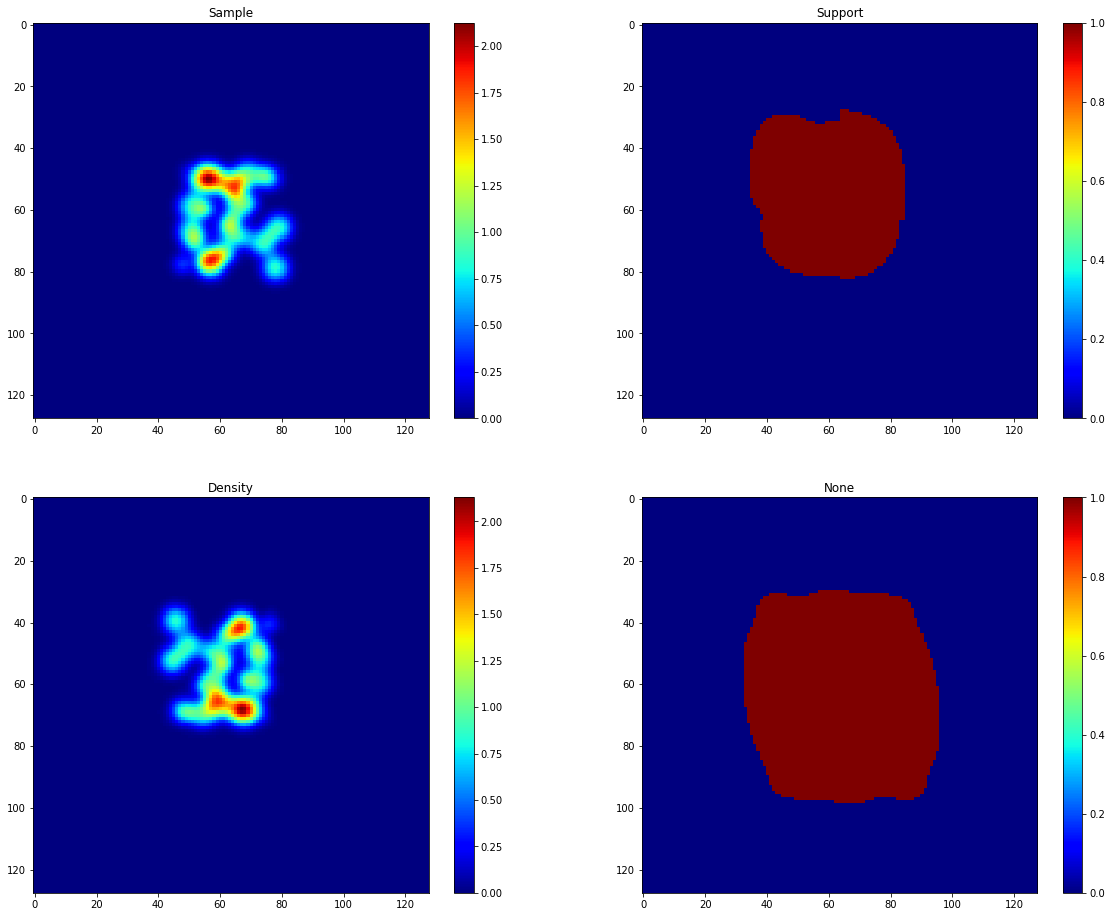

In [25]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.fft.ifftshift(alter_proj_2.data_dict['support']), cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.fft.ifftshift(alter_proj_3.data_dict['density']), cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.fft.ifftshift(alter_proj.data_dict['support']),cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [26]:
recover = np.copy(np.fft.ifftshift(alter_proj_3.data_dict['density']))

recover = np.fliplr(np.flipud(recover))

In [27]:
center_r = ndimage.center_of_mass(recover)
center_s = ndimage.center_of_mass(sample)

In [28]:
shift_r = ndimage.shift(recover, shift=[63 - center_r[0], 63 - center_r[1]])
shift_s = ndimage.shift(sample, shift=[63 - center_s[0], 63 - center_s[1]])

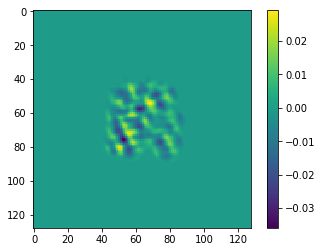

In [29]:
plt.imshow(shift_s - shift_r)
plt.colorbar()
plt.show()

In [30]:
np.sum(np.abs(shift_s - shift_r)) / np.sum(np.abs(shift_s))

0.01506878891762246